In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
# 1. Data Loading and Preprocessing
def load_data():
    """Load and concatenate train and test data, dropping the 'Survived' column."""
    train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
    test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
    # Concatenate without the 'Survived' column
    df = pd.concat([train_df.drop(columns=['Survived']), test_df]).reset_index(drop=True)
    return df

In [13]:
# 2. Visualizing the Original Fare Distribution
def plot_fare_distribution(df):
    """Plot the KDE of the original Fare distribution."""
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['Fare'].dropna(), shade=True, color="blue", label='Fare Distribution')
    plt.title("KDE Plot of Fare Distribution", fontsize=16)
    plt.xlabel("Fare", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.show()

In [14]:
# 3. Sampling Function for Central Limit Theorem
def generate_sampling_distribution(df, sample_size=50, num_samples=100):
    """Generate multiple samples and return the sampling means."""
    samples = []
    for i in range(num_samples):
        sample = df['Fare'].dropna().sample(sample_size).values.tolist()
        samples.append(np.mean(sample))
    sample_means = np.array(samples)
    return sample_means

In [15]:
# 4. Visualize Sampling Distribution vs Original Distribution
def plot_sampling_distribution(df, sample_means, sample_size, num_samples):
    """Plot sampling distribution of means alongside the original fare distribution."""
    plt.figure(figsize=(10, 6))
    
    # Sampling distribution KDE
    sns.kdeplot(sample_means, shade=True, color="green", label=f'Sampling Distribution of Means (n={sample_size}, samples={num_samples})')
    
    # Original Fare distribution for comparison
    sns.kdeplot(df['Fare'].dropna(), shade=False, color="blue", linestyle="--", label="Original Fare Distribution")
    
    plt.title(f"Sampling Distribution of Means (n={sample_size}, samples={num_samples})", fontsize=16)
    plt.xlabel("Mean Fare", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.show()

In [16]:
# 5. Histogram of Sample Means
def plot_histogram_of_means(sample_means):
    """Plot histogram of sample means to visualize Central Limit Theorem."""
    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=30, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Histogram of Sample Means", fontsize=16)
    plt.xlabel("Sample Mean Fare", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()


In [17]:
# 6. Statistics: Mean, Standard Error, and Confidence Interval
def display_statistics(sample_means):
    """Calculate and display statistics: mean, standard error, and confidence interval."""
    sample_mean = sample_means.mean()
    sample_std = sample_means.std()
    standard_error = sample_std / np.sqrt(len(sample_means))
    lower_limit = sample_mean - 2 * sample_std
    upper_limit = sample_mean + 2 * sample_std

    print(f"Mean of Sampling Distribution: {sample_mean:.4f}")
    print(f"Standard Error: {standard_error:.4f}")
    print(f"95% Confidence Interval: [{lower_limit:.4f}, {upper_limit:.4f}]")

    return sample_mean, standard_error, lower_limit, upper_limit


In [18]:
# 7. Visualize Confidence Interval on Sampling Distribution
def plot_confidence_interval(sample_means, lower_limit, upper_limit):
    """Visualize confidence interval on top of the sampling distribution."""
    plt.figure(figsize=(10, 6))
    sns.kdeplot(sample_means, shade=True, color="green", label='Sampling Distribution of Means')

    # Highlight the confidence interval
    plt.axvline(x=lower_limit, color='red', linestyle='--', label=f'Lower 95% CI: {lower_limit:.2f}')
    plt.axvline(x=upper_limit, color='purple', linestyle='--', label=f'Upper 95% CI: {upper_limit:.2f}')
    
    plt.title("Sampling Distribution with Confidence Interval", fontsize=16)
    plt.xlabel("Mean Fare", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.show()


In [19]:
df = load_data()

/tmp/ipykernel_30/2840531780.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fare'].dropna(), shade=True, color="blue", label='Fare Distribution')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


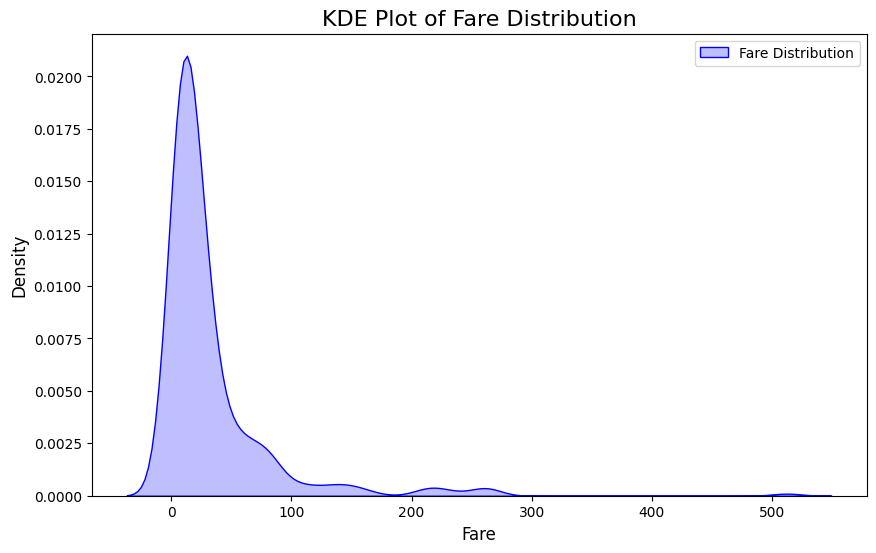

In [20]:
# Step 1: Visualize Original Fare Distribution
plot_fare_distribution(df)

In [21]:
# Step 2: Generate Sampling Distribution
sample_size = 50
num_samples = 100
sample_means = generate_sampling_distribution(df, sample_size, num_samples)

/tmp/ipykernel_30/3569281177.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_means, shade=True, color="green", label=f'Sampling Distribution of Means (n={sample_size}, samples={num_samples})')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/3569281177.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fare'].dropna(), shade=False, color="blue", linestyle="--", label="Original Fare Distribution")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option 

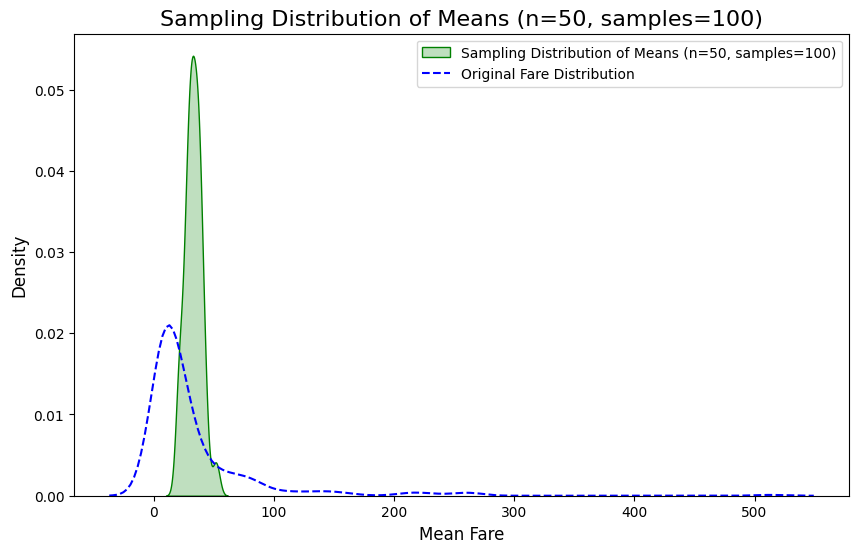

In [22]:
# Step 3: Visualize Sampling Distribution vs Original Distribution
plot_sampling_distribution(df, sample_means, sample_size, num_samples)

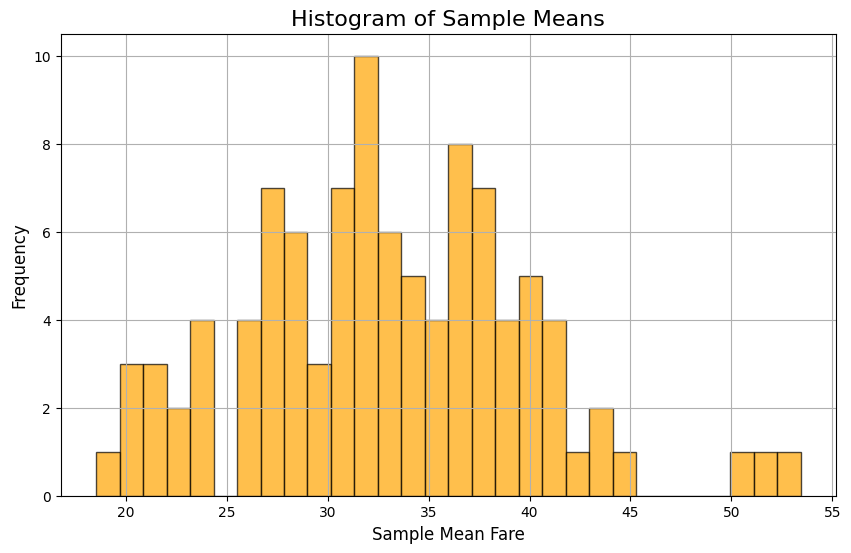

In [23]:
# Step 4: Histogram of Sample Means
plot_histogram_of_means(sample_means)

In [24]:
# Step 5: Display Statistics
mean, se, lower_limit, upper_limit = display_statistics(sample_means)

Mean of Sampling Distribution: 32.8654
Standard Error: 0.6881
95% Confidence Interval: [19.1040, 46.6267]


/tmp/ipykernel_30/3656902945.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_means, shade=True, color="green", label='Sampling Distribution of Means')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


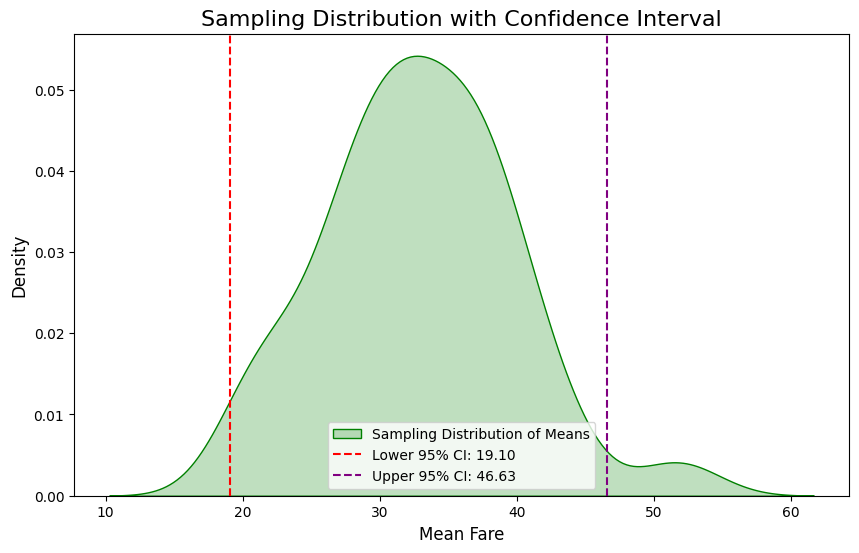

In [25]:
# Step 6: Visualize Confidence Interval on Sampling Distribution
plot_confidence_interval(sample_means, lower_limit, upper_limit)